In [4]:
# %matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv("final_result_impl_huffman.csv")
y = list(map(lambda x: 1/x, list(data['obj2'])))
x = list(data['obj1'])
#data['obj2'].transform(lambda x: 1/x)

In [46]:
color_list = ["blue"] * len(x)
for i in range(len(x)):
#    if data['copy1'][i] <= 4 and data['createtree'][i] < 2 and data['createtree_partition'][i] < 4:
    if data['copy1'][i] == 16:
        color_list[i] = "orange"

In [14]:
fast = data['obj1'] > 36
fast_nodes = data[fast]
fast_nodes.mean()

design                      1069.735507
copy0                          8.489130
copy1                          1.978261
processsymbols                 2.398551
createtree                     1.130435
createtree_partition           1.750000
assigncodeword                 2.391304
assigncodeword_partition       2.336957
obj1                          36.830341
obj2                        1125.862319
dtype: float64

In [15]:
not_fast = data['obj1'] <= 36
everything_else = data[not_fast]
everything_else.mean()

design                      1091.704617
copy0                          7.288425
copy1                          6.110057
processsymbols                 2.316256
createtree                     2.361796
createtree_partition           2.413662
assigncodeword                 2.330171
assigncodeword_partition       2.335863
obj1                          32.396803
obj2                        1815.975332
dtype: float64

In [16]:
from scipy.stats import ttest_ind

print(ttest_ind(fast_nodes['copy0'], everything_else['copy0']))
print(ttest_ind(fast_nodes['copy1'], everything_else['copy1']))
print(ttest_ind(fast_nodes['processsymbols'], everything_else['processsymbols']))
print(ttest_ind(fast_nodes['createtree'], everything_else['createtree']))
print(ttest_ind(fast_nodes['createtree_partition'], everything_else['createtree_partition']))
print(ttest_ind(fast_nodes['assigncodeword'], everything_else['assigncodeword']))
print(ttest_ind(fast_nodes['assigncodeword_partition'], everything_else['assigncodeword_partition']))

Ttest_indResult(statistic=2.7890159771978333, pvalue=0.0053408413586514625)
Ttest_indResult(statistic=-11.360380054816128, pvalue=5.821771642265925e-29)
Ttest_indResult(statistic=1.0106706048977607, pvalue=0.3123059194840935)
Ttest_indResult(statistic=-16.545174007740727, pvalue=1.8460862683315707e-57)
Ttest_indResult(statistic=-8.299431826654729, pvalue=1.9881542419706124e-16)
Ttest_indResult(statistic=0.7487968699227123, pvalue=0.45407457982865407)
Ttest_indResult(statistic=0.013419637007028513, pvalue=0.9892944432539043)


In [38]:
o = (fast_nodes['copy1'] <= 4) & (fast_nodes['createtree'] < 2) & (fast_nodes['createtree_partition'] < 4)
oranged = fast_nodes[o]
not_oranged = fast_nodes[(fast_nodes['copy1'] > 4) | (fast_nodes['createtree'] >= 2) | (fast_nodes['createtree_partition'] >= 4)]

print(ttest_ind(oranged['copy0'], not_oranged['copy0']))
print(ttest_ind(oranged['copy1'], not_oranged['copy1']))
print(ttest_ind(oranged['processsymbols'], not_oranged['processsymbols']))
print(ttest_ind(oranged['createtree'], not_oranged['createtree']))
print(ttest_ind(oranged['createtree_partition'], not_oranged['createtree_partition']))
print(ttest_ind(oranged['assigncodeword'], not_oranged['assigncodeword']))
print(ttest_ind(oranged['assigncodeword_partition'], not_oranged['assigncodeword_partition']))

print("\nOranged Mean:")
print(oranged.mean())
print("\nNOT Oranged Mean:")
print(not_oranged.mean())

Ttest_indResult(statistic=-2.307799096028551, pvalue=0.021755493100630012)
Ttest_indResult(statistic=7.536620365311141, pvalue=7.066845273341438e-13)
Ttest_indResult(statistic=0.8770880797246713, pvalue=0.38120715499665647)
Ttest_indResult(statistic=-12.444660108552235, pvalue=1.7554077135412002e-28)
Ttest_indResult(statistic=-10.821181680989048, pvalue=5.883472580382767e-23)
Ttest_indResult(statistic=-0.5550579696214637, pvalue=0.5793078507483291)
Ttest_indResult(statistic=-1.358537685224501, pvalue=0.17541052744624586)

Oranged Mean:
design                      1041.246154
copy0                          7.907692
copy1                          2.353846
processsymbols                 2.441026
createtree                     1.000000
createtree_partition           1.369231
assigncodeword                 2.364103
assigncodeword_partition       2.271795
obj1                          36.961221
obj2                        1146.528205
dtype: float64

NOT Oranged Mean:
design                  

In [25]:
# identify pareto points as orange
# color_list = ["orange"] * len(x)
# for i in range(len(x)):
#     xval = x[i]
#     yval = y[i]
#     for j in range(len(x)):
#         if j == i:
#             continue
#         if x[j] >= xval and y[j] >= yval:
#             color_list[i] = "blue"
#             break
# color_list[0] = "red"
            
# print(len(list(filter(lambda x: x == "orange" or x == "red", color_list))))


8


Text(0.5, 1.0, 'Characterizing Low Performance - Vivado2')

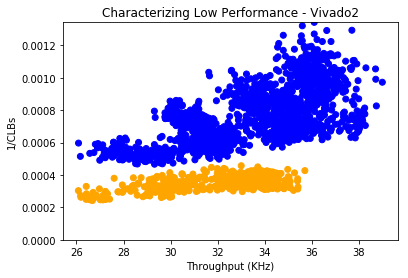

In [47]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=color_list)
ax.set_ylim(0, max(y))
ax.set_xlabel("Throughput (KHz)")
ax.set_ylabel("1/CLBs")
ax.set_title("Characterizing Low Performance - Vivado2")